In [2]:
import numpy as np

# setting the seed allows for reproducible results
np.random.seed(123)

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Model:
    def __init__(self):
        self.data = None
        self.model = None
        self.final_ratio = None

    def sharpe_loss(self, _, y_pred):
        # make all time-series start at 1
        data = tf.divide(self.data, self.data[0])

        # value of the portfolio after allocations applied
        portfolio_values = tf.reduce_sum(tf.multiply(data, y_pred), axis=1)

        portfolio_returns = (portfolio_values[1:] - portfolio_values[:-1]) / portfolio_values[:-1]  # % change formula

        sharpe = K.mean(portfolio_returns) / K.std(portfolio_returns)

        return -sharpe

    def __build_model(self, input_shape, outputs, l_rate):

        model = Sequential([
            LSTM(64, input_shape=input_shape),
            Flatten(),
            Dense(outputs, activation='softmax')
        ])

        Opt = Adam(learning_rate = l_rate)
        model.compile(loss=self.sharpe_loss, optimizer=Opt)
        return model

    def get_allocations(self, data: pd.DataFrame, lr=0.001, ep=20):

        # data with returns
        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)

        data = data.iloc[1:]
        self.data = tf.cast(tf.constant(data), float)

        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns), l_rate = lr)

        fit_predict_data = data_w_ret[np.newaxis,:]
        history = self.model.fit(fit_predict_data, np.zeros((1, len(data.columns))), epochs=ep, shuffle=False)
        self.final_ratio = -history.history['loss'][-1]

        return self.model.predict(fit_predict_data)[0]

In [4]:
df = pd.read_csv('/content/drive/MyDrive/OMF_data_final/uploaded_data_2/Dataset_2_csv.csv')

In [5]:
df = df[df.columns[1:]]

Number of epochs = 20

In [5]:
test_learning_rate = []
test_sharpe_ratio = []

In [6]:
num_epochs = 20

In [9]:
test_rate = 1e-6
while (test_rate <= 100):
  m = Model()
  m.get_allocations(df,test_rate,num_epochs)
  test_learning_rate.append(test_rate)
  test_sharpe_ratio.append(m.final_ratio)
  test_rate *= 10

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: -0.0211
Epoch 2/20
1/1 [==============================] - 0s 141ms/step - loss: -0.0211
Epoch 3/20
1/1 [==============================] - 0s 93ms/step - loss: -0.0211
Epoch 4/20
1/1 [==============================] - 0s 71ms/step - loss: -0.0211
Epoch 5/20
1/1 [==============================] - 0s 79ms/step - loss: -0.0211
Epoch 6/20
1/1 [==============================] - 0s 88ms/step - loss: -0.0211
Epoch 7/20
1/1 [==============================] - 0s 80ms/step - loss: -0.0211
Epoch 8/20
1/1 [==============================] - 0s 92ms/step - loss: -0.0211
Epoch 9/20
1/1 [==============================] - 0s 87ms/step - loss: -0.0211
Epoch 10/20
1/1 [==============================] - 0s 77ms/step - loss: -0.0211
Epoch 11/20
1/1 [==============================] - 0s 77ms/step - loss: -0.0211
Epoch 12/20
1/1 [==============================] - 0s 70ms/step - loss: -0.0211
Epoch 13/20
1/1 [==============================] -

1/1 [==============================] - 0s 368ms/step
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: -0.0429
Epoch 2/20
1/1 [==============================] - 0s 113ms/step - loss: -0.0645
Epoch 3/20
1/1 [==============================] - 0s 129ms/step - loss: -0.0684
Epoch 4/20
1/1 [==============================] - 0s 149ms/step - loss: -0.0718
Epoch 5/20
1/1 [==============================] - 0s 140ms/step - loss: -0.0754
Epoch 6/20
1/1 [==============================] - 0s 147ms/step - loss: -0.0787
Epoch 7/20
1/1 [==============================] - 0s 152ms/step - loss: -0.0870
Epoch 8/20
1/1 [==============================] - 0s 146ms/step - loss: -0.0993
Epoch 9/20
1/1 [==============================] - 0s 150ms/step - loss: -0.1008
Epoch 10/20
1/1 [==============================] - 0s 137ms/step - loss: -0.0979
Epoch 11/20
1/1 [==============================] - 0s 143ms/step - loss: -0.1007
Epoch 12/20
1/1 [==============================] - 0s 140ms/step - l

1/1 [==============================] - 1s 568ms/step
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: -0.0290
Epoch 2/20
1/1 [==============================] - 0s 89ms/step - loss: -0.0692
Epoch 3/20
1/1 [==============================] - 0s 87ms/step - loss: -0.0576
Epoch 4/20
1/1 [==============================] - 0s 88ms/step - loss: -0.0811
Epoch 5/20
1/1 [==============================] - 0s 93ms/step - loss: -0.0810
Epoch 6/20
1/1 [==============================] - 0s 88ms/step - loss: -0.0810
Epoch 7/20
1/1 [==============================] - 0s 84ms/step - loss: -0.0810
Epoch 8/20
1/1 [==============================] - 0s 90ms/step - loss: -0.0810
Epoch 9/20
1/1 [==============================] - 0s 87ms/step - loss: -0.0810
Epoch 10/20
1/1 [==============================] - 0s 89ms/step - loss: -0.0810
Epoch 11/20
1/1 [==============================] - 0s 86ms/step - loss: -0.0810
Epoch 12/20
1/1 [==============================] - 0s 84ms/step - loss: -0.081

In [11]:
print(test_learning_rate, '\n', test_sharpe_ratio)

[1e-06, 9.999999999999999e-06, 9.999999999999999e-05, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
 [0.021087046712636948, 0.024698924273252487, 0.04029009863734245, 0.04821636155247688, 0.07407795637845993, 0.10240841656923294, 0.08097817003726959, 0.08097817003726959, 0.08097817003726959]


In [14]:
Table_1 = pd.DataFrame({'Learning Rate': test_learning_rate, 'Sharpe Ratio': test_sharpe_ratio})
Table_1

,Learning Rate,Sharpe Ratio
0,0.000001,0.021087
1,0.000010,0.024699
2,0.000100,0.040290
3,0.001000,0.048216
4,0.010000,0.074078
5,0.100000,0.102408
6,1.000000,0.080978
7,10.000000,0.080978
8,100.000000,0.080978


In [15]:
test_learning_rate = []
test_sharpe_ratio = []

In [16]:
test_rate = 0.001
while (test_rate <= 1):
  m = Model()
  m.get_allocations(df,test_rate,num_epochs)
  test_learning_rate.append(test_rate)
  test_sharpe_ratio.append(m.final_ratio)
  test_rate += 0.003

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 143ms/step - loss: -0.0774
Epoch 3/20
1/1 [==============================] - 0s 154ms/step - loss: -0.0601
Epoch 4/20
1/1 [==============================] - 0s 161ms/step - loss: -0.0770
Epoch 5/20
1/1 [==============================] - 0s 153ms/step - loss: -0.0810
Epoch 6/20
1/1 [==============================] - 0s 146ms/step - loss: -0.0810
Epoch 7/20
1/1 [==============================] - 0s 152ms/step - loss: -0.0810
Epoch 8/20
1/1 [==============================] - 0s 152ms/step - loss: -0.0810
Epoch 9/20
1/1 [==============================] - 0s 152ms/step - loss: -0.0810
Epoch 10/20
1/1 [==============================] - 0s 158ms/step - loss: -0.0810
Epoch 11/20
1/1 [==============================] - 0s 150ms/step - loss: -0.0810
Epoch 12/20
1/1 [==============================] - 0s 163ms/step - loss: -0.0810
Epoch 13/20
1/1 [==============================] - 0s 157ms/step - loss: -0.0

In [18]:
Graph_1 = pd.DataFrame({'Learning Rate':test_learning_rate, 'Sharpe Ratio':test_sharpe_ratio})
Graph_1

,Learning Rate,Sharpe Ratio
0,0.001,0.035570
1,0.004,0.061302
2,0.007,0.077840
3,0.010,0.073920
4,0.013,0.092365
...,...,...
328,0.985,0.080978
329,0.988,0.080978
330,0.991,0.040284
331,0.994,0.080978


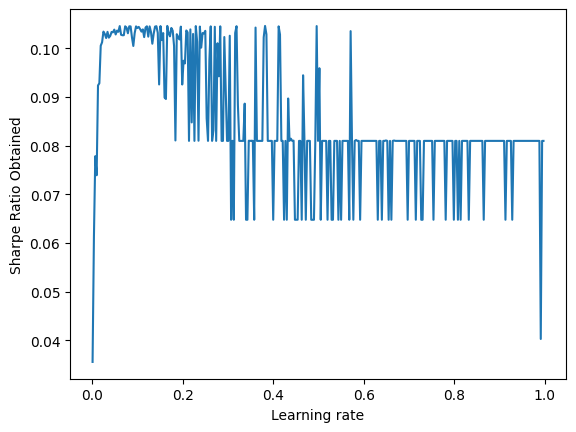

In [17]:
plt.plot(test_learning_rate, test_sharpe_ratio)
plt.xlabel('Learning rate')
plt.ylabel('Sharpe Ratio Obtained')
plt.show()

Good results in neighbourhood of learning rate = 0.1

Number of epochs = 10

In [6]:
num_epochs = 10

In [7]:
test_learning_rate = []
test_sharpe_ratio = []

In [21]:
test_rate = 1e-6
while (test_rate <= 100):
  m = Model()
  m.get_allocations(df,test_rate,num_epochs)
  test_learning_rate.append(test_rate)
  test_sharpe_ratio.append(m.final_ratio)
  test_rate *= 10

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0036
Epoch 2/10
1/1 [==============================] - 0s 109ms/step - loss: 0.0036
Epoch 3/10
1/1 [==============================] - 0s 103ms/step - loss: 0.0036
Epoch 4/10
1/1 [==============================] - 0s 98ms/step - loss: 0.0036
Epoch 5/10
1/1 [==============================] - 0s 108ms/step - loss: 0.0036
Epoch 6/10
1/1 [==============================] - 0s 105ms/step - loss: 0.0036
Epoch 7/10
1/1 [==============================] - 0s 107ms/step - loss: 0.0036
Epoch 8/10
1/1 [==============================] - 0s 106ms/step - loss: 0.0036
Epoch 9/10
1/1 [==============================] - 0s 117ms/step - loss: 0.0036
Epoch 10/10
1/1 [==============================] - 0s 451ms/step
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0069
Epoch 2/10
1/1 [==============================] - 0s 104ms/step - loss: 0.0069
Epoch 3/10
1/1 [==============================] - 0s 100ms/step - loss: 0

In [22]:
Table_2 = pd.DataFrame({'Learning Rate': test_learning_rate, 'Sharpe Ratio': test_sharpe_ratio})
Table_2

,Learning Rate,Sharpe Ratio
0,0.000001,-0.003549
1,0.000010,-0.006763
2,0.000100,0.047612
3,0.001000,0.020160
4,0.010000,0.065711
5,0.100000,0.100361
6,1.000000,0.080978
7,10.000000,0.080978
8,100.000000,0.040284


In [8]:
test_learning_rate = []
test_sharpe_ratio = []

In [9]:
test_rate = 0.001
while (test_rate <= 1):
  m = Model()
  m.get_allocations(df,test_rate,num_epochs)
  test_learning_rate.append(test_rate)
  test_sharpe_ratio.append(m.final_ratio)
  test_rate += 0.003

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0411
Epoch 2/10
1/1 [==============================] - 0s 114ms/step - loss: -0.0421
Epoch 3/10
1/1 [==============================] - 0s 104ms/step - loss: -0.0429
Epoch 4/10
1/1 [==============================] - 0s 105ms/step - loss: -0.0437
Epoch 5/10
1/1 [==============================] - 0s 102ms/step - loss: -0.0444
Epoch 6/10
1/1 [==============================] - 0s 102ms/step - loss: -0.0452
Epoch 7/10
1/1 [==============================] - 0s 107ms/step - loss: -0.0459
Epoch 8/10
1/1 [==============================] - 0s 103ms/step - loss: -0.0466
Epoch 9/10
1/1 [==============================] - 0s 98ms/step - loss: -0.0472
Epoch 10/10
1/1 [==============================] - 0s 452ms/step
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0245
Epoch 2/10
1/1 [==============================] - 0s 119ms/step - loss: -0.0294
Epoch 3/10
1/1 [==============================] - 0s 104ms/ste

1/1 [==============================] - 1s 659ms/step
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0226
Epoch 2/10
1/1 [==============================] - 0s 101ms/step - loss: -0.0396
Epoch 3/10
1/1 [==============================] - 0s 98ms/step - loss: -0.0508
Epoch 4/10
1/1 [==============================] - 0s 99ms/step - loss: -0.0576
Epoch 5/10
1/1 [==============================] - 0s 99ms/step - loss: -0.0619
Epoch 6/10
1/1 [==============================] - 0s 113ms/step - loss: -0.0647
Epoch 7/10
1/1 [==============================] - 0s 97ms/step - loss: -0.0667
Epoch 8/10
1/1 [==============================] - 0s 96ms/step - loss: -0.0683
Epoch 9/10
1/1 [==============================] - 0s 97ms/step - loss: -0.0697
Epoch 10/10
1/1 [==============================] - 0s 96ms/step - loss: -0.0709


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 498ms/step
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: -0.0086
Epoch 2/10
1/1 [==============================] - 0s 121ms/step - loss: -0.0738
Epoch 3/10
1/1 [==============================] - 0s 119ms/step - loss: -0.0729
Epoch 4/10
1/1 [==============================] - 0s 122ms/step - loss: -0.0845
Epoch 5/10
1/1 [==============================] - 0s 116ms/step - loss: -0.1031
Epoch 6/10
1/1 [==============================] - 0s 115ms/step - loss: -0.1024
Epoch 7/10
1/1 [==============================] - 0s 108ms/step - loss: -0.1034
Epoch 8/10
1/1 [==============================] - 0s 119ms/step - loss: -0.1046
Epoch 9/10
1/1 [==============================] - 0s 123ms/step - loss: -0.1041
Epoch 10/10
1/1 [==============================] - 0s 427ms/step
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0212
Epoch 2/10
1/1 [=====================

In [10]:
Graph_2 = pd.DataFrame({'Learning Rate':test_learning_rate, 'Sharpe Ratio':test_sharpe_ratio})
Graph_2

,Learning Rate,Sharpe Ratio
0,0.001,0.047862
1,0.004,0.054984
2,0.007,0.062683
3,0.010,0.069361
4,0.013,0.068687
...,...,...
328,0.985,0.040284
329,0.988,0.080978
330,0.991,0.080978
331,0.994,0.080978


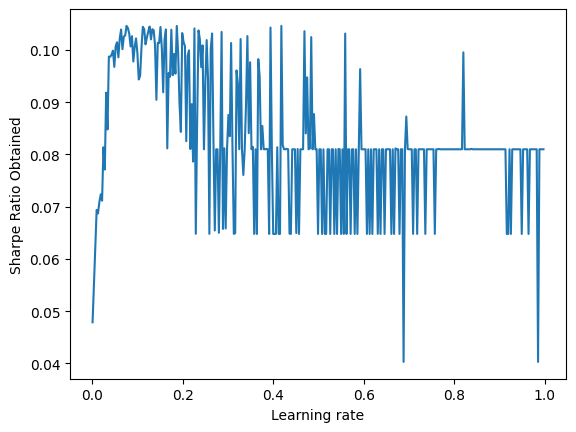

In [11]:
plt.plot(test_learning_rate, test_sharpe_ratio)
plt.xlabel('Learning rate')
plt.ylabel('Sharpe Ratio Obtained')
plt.show()

Epochs = 15

In [6]:
num_epochs = 15

In [7]:
test_learning_rate = []
test_sharpe_ratio = []

In [14]:
test_rate = 1e-6
while (test_rate <= 100):
  m = Model()
  m.get_allocations(df,test_rate,num_epochs)
  test_learning_rate.append(test_rate)
  test_sharpe_ratio.append(m.final_ratio)
  test_rate *= 10

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: -0.0066
Epoch 2/15
1/1 [==============================] - 0s 101ms/step - loss: -0.0066
Epoch 3/15
1/1 [==============================] - 0s 108ms/step - loss: -0.0066
Epoch 4/15
1/1 [==============================] - 0s 114ms/step - loss: -0.0066
Epoch 5/15
1/1 [==============================] - 0s 109ms/step - loss: -0.0066
Epoch 6/15
1/1 [==============================] - 0s 109ms/step - loss: -0.0066
Epoch 7/15
1/1 [==============================] - 0s 112ms/step - loss: -0.0066
Epoch 8/15
1/1 [==============================] - 0s 114ms/step - loss: -0.0067
Epoch 9/15
1/1 [==============================] - 0s 106ms/step - loss: -0.0067
Epoch 10/15
1/1 [==============================] - 0s 110ms/step - loss: -0.0067
Epoch 11/15
1/1 [==============================] - 0s 123ms/step - loss: -0.0067
Epoch 12/15
1/1 [==============================] - 0s 249ms/step - loss: -0.0067
Epoch 13/15
1/1 [=======================

In [15]:
Table_3 = pd.DataFrame({'Learning Rate': test_learning_rate, 'Sharpe Ratio': test_sharpe_ratio})
Table_3

,Learning Rate,Sharpe Ratio
0,0.000001,0.006659
1,0.000010,0.032151
2,0.000100,0.021007
3,0.001000,0.046629
4,0.010000,0.085253
5,0.100000,0.103786
6,1.000000,0.080978
7,10.000000,0.080978
8,100.000000,0.080978


In [8]:
test_learning_rate = []
test_sharpe_ratio = []

In [9]:
test_learning_rate.append(0.001)
test_sharpe_ratio.append(0.046629)

In [10]:
test_rate = 0.01
while (test_rate <= 1):
  m = Model()
  m.get_allocations(df,test_rate,num_epochs)
  test_learning_rate.append(test_rate)
  test_sharpe_ratio.append(m.final_ratio)
  test_rate += 0.003

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: -0.0188
Epoch 2/15
1/1 [==============================] - 0s 100ms/step - loss: -0.0335
Epoch 3/15
1/1 [==============================] - 0s 108ms/step - loss: -0.0444
Epoch 4/15
1/1 [==============================] - 0s 102ms/step - loss: -0.0518
Epoch 5/15
1/1 [==============================] - 0s 114ms/step - loss: -0.0568
Epoch 6/15
1/1 [==============================] - 0s 103ms/step - loss: -0.0602
Epoch 7/15
1/1 [==============================] - 0s 100ms/step - loss: -0.0626
Epoch 8/15
1/1 [==============================] - 0s 113ms/step - loss: -0.0643
Epoch 9/15
1/1 [==============================] - 0s 107ms/step - loss: -0.0657
Epoch 10/15
1/1 [==============================] - 0s 99ms/step - loss: -0.0669
Epoch 11/15
1/1 [==============================] - 0s 110ms/step - loss: -0.0679
Epoch 12/15
1/1 [==============================] - 0s 98ms/step - loss: -0.0688
Epoch 13/15
1/1 [=========================

1/1 [==============================] - 1s 893ms/step
Epoch 1/15
1/1 [==============================] - 7s 7s/step - loss: -0.0335
Epoch 2/15
1/1 [==============================] - 0s 127ms/step - loss: -0.0537
Epoch 3/15
1/1 [==============================] - 0s 154ms/step - loss: -0.0614
Epoch 4/15
1/1 [==============================] - 0s 194ms/step - loss: -0.0648
Epoch 5/15
1/1 [==============================] - 0s 128ms/step - loss: -0.0669
Epoch 6/15
1/1 [==============================] - 0s 116ms/step - loss: -0.0686
Epoch 7/15
1/1 [==============================] - 0s 119ms/step - loss: -0.0707
Epoch 8/15
1/1 [==============================] - 0s 123ms/step - loss: -0.0733
Epoch 9/15
1/1 [==============================] - 0s 129ms/step - loss: -0.0763
Epoch 10/15
1/1 [==============================] - 0s 125ms/step - loss: -0.0789
Epoch 11/15
1/1 [==============================] - 0s 123ms/step - loss: -0.0807
Epoch 12/15
1/1 [==============================] - 0s 151ms/step - l

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 148ms/step - loss: -0.0648
Epoch 13/15
1/1 [==============================] - 0s 129ms/step - loss: -0.0648
Epoch 14/15
1/1 [==============================] - 0s 123ms/step - loss: -0.0648
Epoch 15/15
1/1 [==============================] - 0s 426ms/step
Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: -0.0364
Epoch 2/15
1/1 [==============================] - 0s 175ms/step - loss: -0.0665
Epoch 3/15
1/1 [==============================] - 0s 161ms/step - loss: -0.0803
Epoch 4/15
1/1 [==============================] - 0s 168ms/step - loss: -0.1034
Epoch 5/15
1/1 [==============================] - 0s 171ms/step - loss: -0.0817
Epoch 6/15
1/1 [==============================] - 0s 167ms/step - loss: -0.0810
Epoch 7/15
1/1 [==============================] - 0s 171ms/step - loss: -0.0810
Epoch 8/15
1/1 [==============================] - 0s 184ms/step - loss: -0.0810
Epoch 9/15
1/1 [

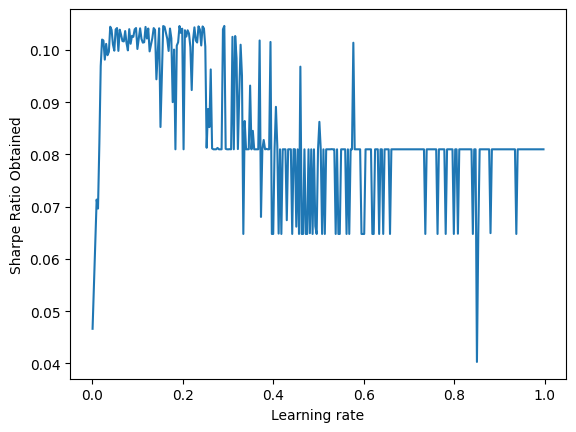

In [11]:
plt.plot(test_learning_rate, test_sharpe_ratio)
plt.xlabel('Learning rate')
plt.ylabel('Sharpe Ratio Obtained')
plt.show()